# Problem Set 2

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

from functions import gini


In [103]:
!pip install xlrd
data = pd.read_excel('UNPS_1112_PS2.xls')
data

,hhid,wave,year,region,district,county,urban,year_surv,month_surv,head_gender,...,income,wage_labor,business_inc,other_inc,agriculture_inc,livestock_inc,wealth,asset_value,wealth_agrls,land_value_hat
0,1013000204,2011-2012,2012,1,KALANGALA,KYAMUSWA,0,2012,3,1.0,...,717.277761,NaN,717.277761,0.000000,NaN,NaN,102.530580,102.530580,NaN,NaN
1,1013000206,2011-2012,2012,1,KAMPALA,RUBAGA DIVISION,0,2012,9,1.0,...,1839.529498,949.476802,890.052696,0.000000,NaN,NaN,821.989843,821.989843,NaN,NaN
2,1013000210,2011-2012,2012,1,KALANGALA,KYAMUSWA,0,2012,2,1.0,...,91.623072,NaN,NaN,0.000000,NaN,91.623072,1202.661890,268.324710,934.337180,NaN
3,1013000212,2011-2012,2012,4,KYEGEGWA,KYAKA,0,2012,3,1.0,...,2617.802047,1989.529555,628.272491,0.000000,NaN,NaN,494.764587,494.764587,NaN,NaN
4,101300021302,2011-2012,2012,1,MPIGI,MAWOKOTA,0,2012,4,2.0,...,811.518634,NaN,157.068123,654.450512,NaN,NaN,54.537543,54.537543,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2608,4193003504,2011-2012,2012,4,KIRUHURA,NYABUSHOZI,0,2012,2,2.0,...,1046.796900,NaN,NaN,0.000000,1037.634593,9.162307,11837.852383,256.108300,119.109993,11462.634090
2609,4193003506,2011-2012,2012,4,KIRUHURA,NYABUSHOZI,0,2012,2,1.0,...,10505.763174,NaN,8376.966549,130.890102,668.412123,1329.494399,6291.311323,405.759317,4794.940749,1090.611257
2610,4193003507,2011-2012,2012,4,KIRUHURA,NYABUSHOZI,0,2012,2,2.0,...,1216.754391,NaN,NaN,0.000000,848.167863,368.586528,1888.801009,241.274089,271.596962,1375.929958
2611,4193003508,2011-2012,2012,4,KIRUHURA,NYABUSHOZI,0,2012,8,1.0,...,814.485477,NaN,NaN,0.000000,814.485477,NaN,4142.348323,842.059658,10.471208,3289.817457


#### Question 1

**Part a**

In [104]:
# Cleaning up the data
duplicate_count = data["hhid"].duplicated().sum()
print("Number of duplicate household IDs:", duplicate_count)

unique_households = data["hhid"].nunique() #Not necessary since there are no duplicates
print("Number of unique household IDs: ", unique_households)

data.shape # (rows, columns) meaning (households, variables)

Number of duplicate household IDs: 0
Number of unique household IDs:  2613


(2613, 30)

**Part b**

In [105]:
data[["head_gender", "head_age", "familysize", "consumption", "income", "wealth"]].describe()

,head_gender,head_age,familysize,consumption,income,wealth
count,2597.000000,2597.000000,2597.000000,2613.000000,2613.000000,2613.000000
mean,1.314209,46.068156,7.480554,1803.792687,1860.075795,4912.698146
std,0.464289,15.068960,3.712526,1308.742941,2607.517603,8359.886497
min,1.000000,14.000000,1.000000,250.305506,27.486921,0.000000
25%,1.000000,34.000000,5.000000,918.324958,471.204368,720.019916
50%,1.000000,44.000000,7.000000,1426.614855,1061.194208,2108.598380
75%,2.000000,56.000000,9.000000,2296.859516,2234.800590,5221.939857
max,2.000000,100.000000,33.000000,8369.898484,52137.736864,76396.339917


There must be missing values for head_gender, head_age and familysize since they only have 2597 observations compared to 2613. There also seems to be potential outliers in family size (33) and in income and wealth since their maximum values are so much higher than their median or even 75th precentile.

**Part c**

In [106]:
# Make a copy of the original dataset
df1 = data.copy()

# Create the dummy variable (1 = female, 0 = male), keep NaN if gender is missing
df1['female_head'] = (df1['head_gender'] == 2.0).astype(int)

# To check
print(df1[['head_gender', 'female_head']].tail())

      head_gender  female_head
2608          2.0            1
2609          1.0            0
2610          2.0            1
2611          1.0            0
2612          1.0            0


In [110]:
count_female = (df1['female_head'] == 1).sum()
print("Number of female heads:", count_female)

count_male = (df1['female_head'] == 0).sum()
print("Number of male heads:", count_male)

total_heads = count_female + count_male
print("Total = ", total_heads)

percent_female_heads = (count_female / total_heads) * 100
print(f"Percentage of female = {percent_female_heads:.2f}%")

Number of female heads: 816
Number of male heads: 1797
Total =  2613
Percentage of female = 31.23%


**Part d**

In [111]:
gender_summary = (df1.groupby('female_head')[['consumption', 'familysize', 'head_age']].mean())  
# Using mean to calculate the average of each group

gender_summary
# Remeber that 0 corresponds to male head and 1 to female head

,consumption,familysize,head_age
female_head,,,
0,1899.392959,7.720943,44.388546
1,1593.261206,6.955882,49.734069


Average consumption is significantly higher in households with male heads and age average age is significantly higeher for female heads.

#### Question 2

**Part a**

In [112]:
# Preparing the data so that there are no erros when we take logs

df1.dropna(axis=0) # Deletes observations including NaNs - Not a number

# from the table of statistics we know that there is at least one observation with a value of 0 for wealth
print((df1['wealth'] == 0).sum()) # Counts how many we have

16


In [113]:
# Remove the observations that have values of 0 for wealth
df1 = df1[(df1['wealth'] != 0)]
print((df1['wealth'] == 0).sum()) # Check that the count is now 0

0


In [114]:
# Define the logs
log_c = np.log(df1["consumption"])
log_inc = np.log(df1["income"])
log_w = np.log(df1["wealth"])

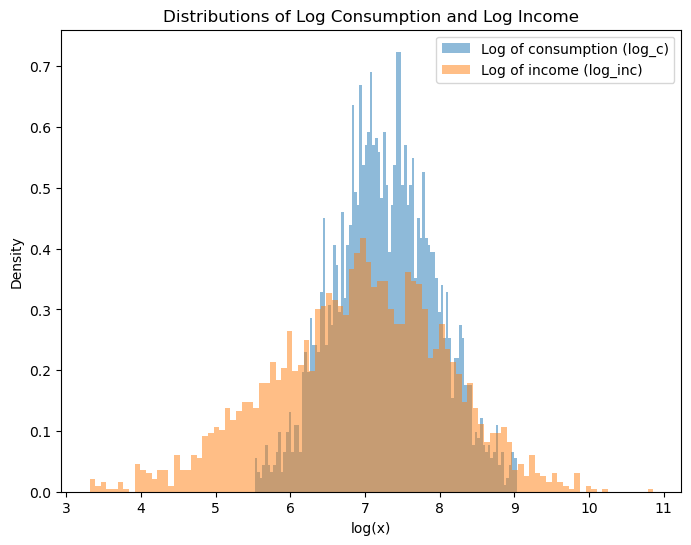

In [115]:
#Plotting
plt.figure(figsize=(8,6))

plt.hist(log_c, bins=100, alpha=0.5, label='Log of consumption (log_c)', density=True) 
plt.hist(log_inc, bins=100, alpha=0.5, label='Log of income (log_inc)', density=True)

plt.xlabel('log(x)')
plt.ylabel('Density')
plt.title('Distributions of Log Consumption and Log Income')
plt.legend()
plt.show()

Both distributions look like normal distributions. Log of consumption less so due to the dip in frequency of values in what would be the median and mean (middle) and lack of tails. Log of income is also a symetric bell curve but it seems more shallow than a normal distribution.

Inequality is higher in income than in consumption since the range is larger than in the log of consumtion distribution.

**Part b**

In [116]:
# Using pandas
var_log_c = log_c.var()
var_log_inc = log_inc.var()
var_log_w = log_w.var()

# Rounds to 4 decimal points
print(f"Variance of log(consumption) = {var_log_c:0.4f}")
print(f"Variance of log(income) = {var_log_inc:0.4f}")
print(f"Variance of log(wealth) = {var_log_w:0.4f}")

Variance of log(consumption) = 0.4466
Variance of log(income) = 1.3389
Variance of log(wealth) = 2.6772


Using table 3, column 5 from the data given:


| Variance of log() | Uganda | US |
| ------|---------------|----------------
| Consumption | 0.4466 | 0.79 |
| Income | 1.3389 | 0.97 |
| Wealth | 2.6772 | 2.11 |

The order of magnitude is the same for both Uganda and the US. Based on the assumption that the variance of logs is a measure of inequality, Uganda has lower consumption inequality but higher income and wealth inequality than the US.

**Part c**

In [117]:
# Urban is a dummy variable, like female_head
summary = (df1.groupby('urban')[['consumption', 'income', 'wealth']].mean())  
summary

,consumption,income,wealth
urban,,,
0,1627.313595,1714.775035,4533.857241
1,2523.968738,2456.992260,6711.015029


The difference between urban (1) and rural (0) is large for all 3 of the variables but especially so for wealth.

**Part d**

In [118]:
def log_variance(x):
    return np.log(x).var()

# Group by urban/rural and compute variance for each variable
variance_summary = df1.groupby('urban').agg({'consumption': log_variance, 
                                             'income': log_variance,'wealth': log_variance}) #.round(4)

# .agg() allows us to run functions to separate groups

variance_summary

,consumption,income,wealth
urban,,,
0,0.412732,1.345282,2.388743
1,0.435240,1.101915,3.920238


**Part e**

In [119]:
def gini(x):
    """Compute Gini coefficient of a numpy array"""
    x = np.sort(x)  # sort values
    n = len(x)
    cum_x = np.cumsum(x)
    return ((2 * np.sum((np.arange(1, n+1)*x))) / (n * cum_x[-1]) - (n+1)/ n)
    

gini_c = gini(df1['consumption'])
gini_inc = gini(df1['income'])
gini_w = gini(df1['wealth'])

# Print results using f-strings
print(f"Gini coefficient of consumption: {gini_c:.4f}")
print(f"Gini coefficient of income: {gini_inc:.4f}")
print(f"Gini coefficient of wealth: {gini_w:.4f}")

Gini coefficient of consumption: 0.3642
Gini coefficient of income: 0.5559
Gini coefficient of wealth: 0.6547


Table comparing Uganda gini coefficients to those given for the US:

| Gini (rural, urban) | Uganda | US |
| ------|---------------|----------------
| Consumption |0.3642 | 0.41 |
| Income | 0.5559 | 0.44 |
| Wealth | 0.6547 | 0.79 |

The order of magnitude is the same for both Uganda and the US. Inequality as measured by the gini coefficient is lower in Uganda for consumption but higher than the US for income and wealth. The values for income contradict our previous comparison using the variance of logs to model inequality.

**Part f**

In [120]:
# Using the original data set to include those with 0 wealth

 # NaNs are automatically excluded
print("Nan Count: ", data['wealth'].isna().sum())  # But we didn't have any to start with
print()


w_idx = int(len(data)*0.5) # Otherwise we have 1306.5 observations
print("Half of the observations for wealth: ", w_idx)

least_w_half = data.nsmallest(w_idx, 'wealth')  # Effectively creating a new dataset with only the lower half

sum_least_wealth_half = least_w_half['wealth'].sum()
print("Total wealth of the least wealthy half: ", sum_least_wealth_half)

sum_wealth = data['wealth'].sum()
print("Total wealth of all observations: ", sum_wealth)

print()

w_share_lower_half = (sum_least_wealth_half / sum_wealth) *100

print(f"Share of the wealth held by the bottom 50% (rounded to 3 decimal places) is {w_share_lower_half:0.3f}%")

Nan Count:  0

Half of the observations for wealth:  1306
Total wealth of the least wealthy half:  1053980.0408653014
Total wealth of all observations:  12836880.255180921

Share of the wealth held by the bottom 50% (rounded to 3 decimal places) is 8.211%


In [121]:

# Sort by wealth
data_no_nan = data.dropna(subset=['wealth'])
data_sorted = data_no_nan.sort_values(by='wealth', ascending=True)

# Convert wealth to numpy array
var_array = data_sorted['wealth'].to_numpy()

# Sum all the wealth values of the array
total_wealth = var_array.sum()
n = len(var_array) # Number of observations

# bottom 50%, top 10%, 5%, 1% since it is ascending
shares = [0.5, 0.9, 0.95, 0.99]  

# Find the index of each array 
percentiles = n * np.array(bottom) 
percentiles = percentiles.tolist() # Convert to list as per lab, but we don't need to?

# Convert to integer indices, so that n != x.5 observations 
percentiles = [int(x) for x in percentiles]

# Sums of wealth for each index
bottom_50_sum = var_array[:percentiles[0]].sum()
top_10_sum = var_array[percentiles[1]:].sum()
top_5_sum = var_array[percentiles[2]:].sum()
top_1_sum = var_array[percentiles[3]:].sum()

# Shares of total wealth
share_bottom_50 = (bottom_50_sum / total_wealth) * 100
share_top_10 = (top_10_sum / total_wealth) * 100
share_top_5 = (top_5_sum / total_wealth) * 100
share_top_1 = (top_1_sum / total_wealth) * 100

# Formating results
print(f"Total wealth: {total_wealth:,.3f}\n")

print("Wealth shares, rounded to 3 decimal places:")
print(f"  Bottom 50%:\t {share_bottom_50:0.3f}%")
print(f"  Top 10%:\t {share_top_10:0.3f}%")
print(f"  Top 5%:\t {share_top_5:0.3f}%")
print(f"  Top 1%:\t {share_top_1:0.3f}%")


Total wealth: 12,836,880.255

Wealth shares, rounded to 3 decimal places:
  Bottom 50%:	 8.211%
  Top 10%:	 51.106%
  Top 5%:	 35.248%
  Top 1%:	 11.909%


**Part g**

-------------------------------Discussion--------------

**Part h**

-------------------------------Discussion--------------

#### Question 3

Preliminary data handling

In [122]:
print(df1.columns)
data["head_age"].tail()

Index(['hhid', 'wave', 'year', 'region', 'district', 'county', 'urban',
       'year_surv', 'month_surv', 'head_gender', 'head_age', 'head_ethnic',
       'head_writeread_yes', 'head_classeduc', 'familysize', 'consumption',
       'cfood', 'cnodur', 'cdur', 'cfood_gift', 'income', 'wage_labor',
       'business_inc', 'other_inc', 'agriculture_inc', 'livestock_inc',
       'wealth', 'asset_value', 'wealth_agrls', 'land_value_hat',
       'female_head'],
      dtype='object')


2608    41.0
2609    51.0
2610    60.0
2611    84.0
2612    45.0
Name: head_age, dtype: float64

In [162]:
df2 = (df1.loc[(df1['head_age'] >= 18) & (df1['head_age'] <= 80)].copy())

# Exploring
df2["head_age"]

0       35.0
1       32.0
2       39.0
3       51.0
4       29.0
        ... 
2607    33.0
2608    41.0
2609    51.0
2610    60.0
2612    45.0
Name: head_age, Length: 2524, dtype: float64

In [170]:
# Grouping ages into bins
bins = [18, 29, 44, 59, 80]
labels = ['18–29', '30–44', '45–59', '60–80']

# Create new column with the bins so that we can use these in the plots
df2.loc[:, 'age_group'] = pd.cut(df2['head_age'], bins=bins, labels=labels, right=True)


#df2['age_group'] = pd.cut(df2['head_age'], bins=bins, labels=labels, right=True), this gave me an error that 
#could also be solve via copy


**Part a**

In [164]:
df2.columns

Index(['hhid', 'wave', 'year', 'region', 'district', 'county', 'urban',
       'year_surv', 'month_surv', 'head_gender', 'head_age', 'head_ethnic',
       'head_writeread_yes', 'head_classeduc', 'familysize', 'consumption',
       'cfood', 'cnodur', 'cdur', 'cfood_gift', 'income', 'wage_labor',
       'business_inc', 'other_inc', 'agriculture_inc', 'livestock_inc',
       'wealth', 'asset_value', 'wealth_agrls', 'land_value_hat',
       'female_head', 'age_group'],
      dtype='object')

In [165]:
print(df2[['head_age', 'head_gender', 'female_head', 'age_group']].head())

   head_age  head_gender  female_head age_group
0      35.0          1.0            0     30–44
1      32.0          1.0            0     30–44
2      39.0          1.0            0     30–44
3      51.0          1.0            0     45–59
4      29.0          2.0            1     18–29


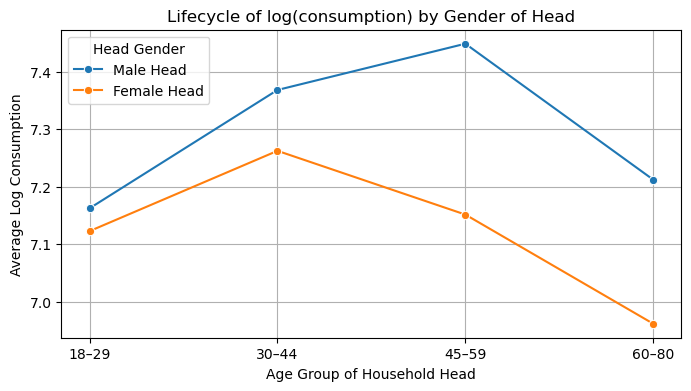

In [177]:
df2.loc[:, 'log_consumption'] = np.log(df2['consumption'])

# Calaculate the mean log to keep the plot tidy
# reset_index() allows seaborn to read the data
df2_grouped = df2.groupby(['age_group', 'female_head'], observed=True)['log_consumption'].mean().reset_index()


plt.figure(figsize=(8,4))
sns.lineplot(
    data=df2_grouped,
    x='age_group',
    y='log_consumption',
    hue='female_head',
    marker='o',
    errorbar= None
)

plt.xlabel('Age Group of Household Head')
plt.ylabel('Average Log Consumption')
plt.title('Lifecycle of log(consumption) by Gender of Head')
plt.legend(title='Head Gender', labels=['Male Head', 'Female Head'])
plt.grid(True)
plt.show()



**Part b**

**(i)**

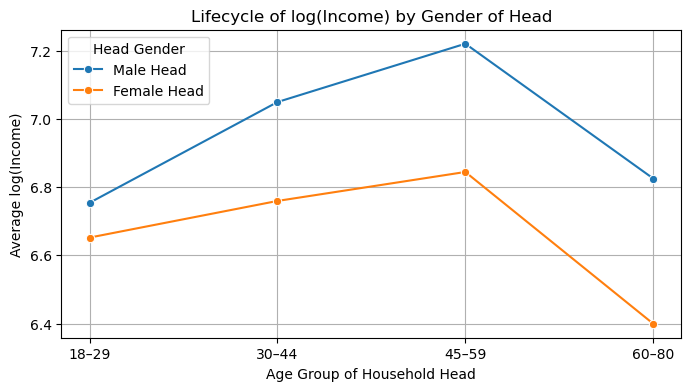

In [179]:
df2.loc[:, 'log_income'] = np.log(df2['income'])



df2_grouped = df2.groupby(['age_group', 'female_head'], observed=True)['log_income'].mean().reset_index()


plt.figure(figsize=(8,4))
sns.lineplot(
    data=df2_grouped,
    x='age_group',
    y='log_income',
    hue='female_head',
    marker='o',
    errorbar= None
)

plt.xlabel('Age Group of Household Head')
plt.ylabel('Average log(Income)')
plt.title('Lifecycle of log(Income) by Gender of Head')
plt.legend(title='Head Gender', labels=['Male Head', 'Female Head'])
plt.grid(True)
plt.show()


**(ii)**

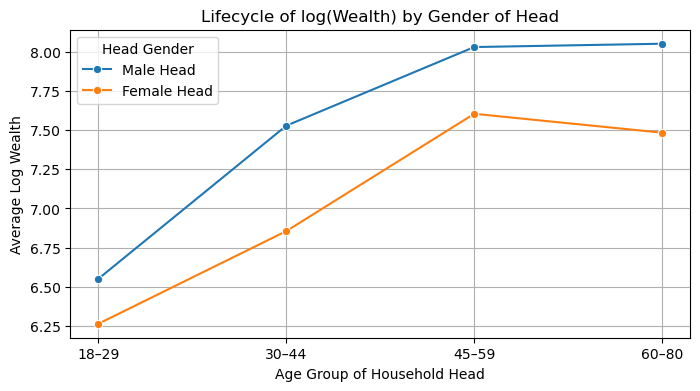

In [176]:
df2.loc[:, 'log_wealth'] = np.log(df2['wealth'])



df2_grouped = df2.groupby(['age_group', 'female_head'], observed=True)['log_wealth'].mean().reset_index()


plt.figure(figsize=(8,4))
sns.lineplot(
    data=df2_grouped,
    x='age_group',
    y='log_wealth',
    hue='female_head',
    marker='o',
    errorbar= None
)

plt.xlabel('Age Group of Household Head')
plt.ylabel('Average Log Wealth')
plt.title('Lifecycle of log(Wealth) by Gender of Head')
plt.legend(title='Head Gender', labels=['Male Head', 'Female Head'])
plt.grid(True)
plt.show()

**Part c**

Overall: For all variables the growth/decline rates of 

Consumption:

Income:

Wealth: